# Importing the Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

from sklearn import (model_selection,
                    feature_selection,
                     linear_model,
                     metrics)

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]    AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
print(stopwords.words('english'))  #unneccessary data

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data PreProcessing

In [56]:
news_data = pd.read_csv(r"Fake News\train.csv\train.csv")

In [58]:
news_data.shape

(20800, 5)

In [60]:
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [62]:
#counting number of null values
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [64]:
#replacing null with empty string

news_data = news_data.fillna('')

In [66]:
news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [68]:
# merging title and author column
news_data['content'] = news_data['author'] + ' ' + news_data['title']

In [70]:
news_data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [72]:
X = news_data.drop(columns='label', axis=1)
Y = news_data['label']

In [14]:
X.head()

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy Iranian woman jailed for fictio...


In [15]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

# Stemming

### Stemming is the process of reducing a word to its root word

### Example: actor, actress, acting ---> act

In [19]:
port_stem = PorterStemmer()

In [20]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [76]:
news_data['content'] = news_data['content'].apply(stemming)

In [77]:
print(news_data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [78]:
X = news_data['content'].values
Y = news_data['label'].values

In [79]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [80]:
print(Y)

[1 0 1 ... 0 1 1]


In [81]:
Y.shape

(20800,)

# Vectorization

### converting textual to numerical data

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
# Tf --> Term Frequency
# idf --> inverse documnet frequency
# tf check the frequency of the word in a document, understanding its importance and assigns values
# idf also checks the frequency of the word in document, but realises unimportance and assigns values
# thus creating feature vectors, i.e, numerical

In [90]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# Spliting Dataset to Training and Test Data

In [92]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Building a model

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

log_reg = LogisticRegression(max_iter=200)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn5 = KNeighborsClassifier()
knn3 = KNeighborsClassifier(n_neighbors=3)
knn10 = KNeighborsClassifier(n_neighbors=10)
svm = SVC()
naive_bayes = GaussianNB()
sgd = SGDClassifier()

# Training the models

In [96]:
from sklearn.preprocessing import StandardScaler


log_reg.fit(X_train, Y_train)
decision_tree.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
knn5.fit(X_train, Y_train)
knn3.fit(X_train, Y_train)
knn10.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
#naive_bayes.fit(X_train_scaled, Y_train)
sgd.fit(X_train, Y_train)

SGDClassifier()

# Predicting on Train Set

In [98]:
log_reg_pred_train       = log_reg.predict(X_train)
decision_tree_pred_train = decision_tree.predict(X_train)
random_forest_pred_train = random_forest.predict(X_train)
knn5_pred_train          = knn5.predict(X_train)
knn3_pred_train          = knn3.predict(X_train)
knn10_pred_train         = knn10.predict(X_train)
svm_pred_train           = svm.predict(X_train)
#naive_bayes_pred_train   = naive_bayes.predict(X_train)
sgd_pred_train           = sgd.predict(X_train)

# Predicting on Test Set

In [100]:
log_reg_pred       = log_reg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
knn5_pred          = knn5.predict(X_test)
knn3_pred          = knn3.predict(X_test)
knn10_pred         = knn10.predict(X_test)
svm_pred           = svm.predict(X_test)
#naive_bayes_pred   = naive_bayes.predict(X_test)
sgd_pred          = sgd.predict(X_test)

# Evaluating on Train Set

In [102]:
from sklearn.metrics import accuracy_score

train_results = {
    "Logistic Regression": accuracy_score(Y_train, log_reg_pred_train),
    "Decision Tree": accuracy_score(Y_train, decision_tree_pred_train),
    "Random Forest": accuracy_score(Y_train, random_forest_pred_train),
    "k-NN5": accuracy_score(Y_train, knn5_pred_train),
    "k-NN3": accuracy_score(Y_train, knn3_pred_train),
    "k-NN10": accuracy_score(Y_train, knn10_pred_train),
    "SVM": accuracy_score(Y_train, svm_pred_train),
    #"Naive Bayes": accuracy_score(Y_train, naive_bayes_pred_train),
    "SGD Classifier": accuracy_score(Y_train, sgd_pred_train)
}

In [103]:
train_results_df = pd.DataFrame(list(train_results.items()), columns=['Model', 'Accuracy'])

print(train_results_df)

                 Model  Accuracy
0  Logistic Regression  0.986358
1        Decision Tree  1.000000
2        Random Forest  1.000000
3                k-NN5  0.536058
4                k-NN3  0.586599
5               k-NN10  0.517488
6                  SVM  0.999099
7       SGD Classifier  0.994832


# Evaluating on Test Set

In [105]:
test_results = {
    "Logistic Regression": accuracy_score(Y_test, log_reg_pred),
    "Decision Tree": accuracy_score(Y_test, decision_tree_pred),
    "Random Forest": accuracy_score(Y_test, random_forest_pred),
    "k-NN5": accuracy_score(Y_test, knn5_pred),
    "k-NN3": accuracy_score(Y_test, knn3_pred),
    "k-NN10": accuracy_score(Y_test, knn10_pred),
    "SVM": accuracy_score(Y_test, svm_pred),
    #"Naive Bayes": accuracy_score(Y_test, naive_bayes_pred),
    "SGD Classifier": accuracy_score(Y_test, sgd_pred)
}

In [106]:
test_results_df = pd.DataFrame(list(test_results.items()), columns=['Model', 'Accuracy'])

print(test_results_df.sort_values(by='Accuracy', ascending=False))

                 Model  Accuracy
2        Random Forest  0.993269
1        Decision Tree  0.992308
6                  SVM  0.988942
7       SGD Classifier  0.988942
0  Logistic Regression  0.979087
4                k-NN3  0.536058
3                k-NN5  0.523317
5               k-NN10  0.514183


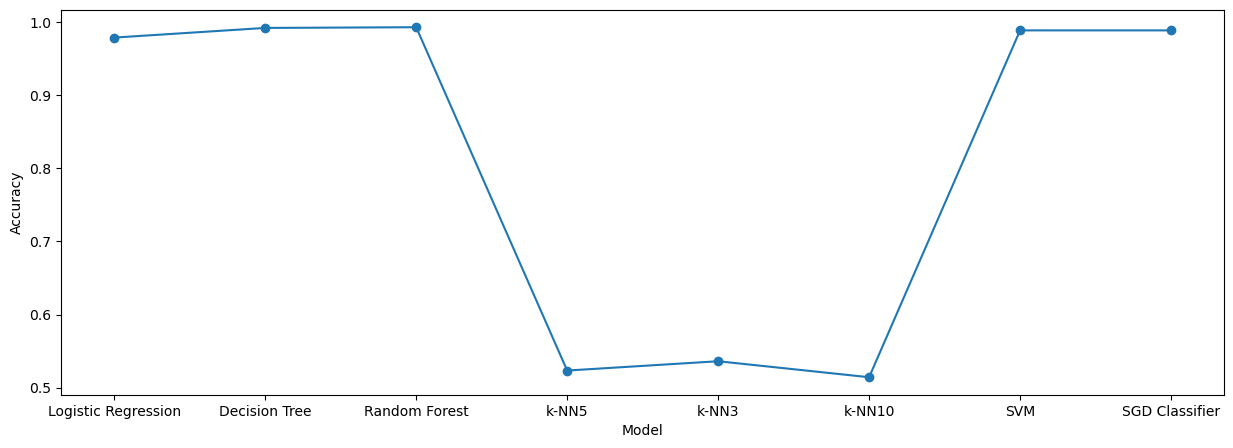

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(test_results_df['Model'], test_results_df['Accuracy'], marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')

#plt.xlim(0.8, 1.0)

plt.show()

In [172]:
from sklearn.metrics import confusion_matrix
confusion_matrix_results = {
    "Logistic Regression": confusion_matrix(Y_test, log_reg_pred),
    "Decision Tree": confusion_matrix(Y_test, decision_tree_pred),
    "Random Forest": confusion_matrix(Y_test, random_forest_pred),
    "k-NN5": confusion_matrix(Y_test, knn5_pred),
    "k-NN3": confusion_matrix(Y_test, knn3_pred),
    "k-NN10": confusion_matrix(Y_test, knn10_pred),
    "SVM": confusion_matrix(Y_test, svm_pred),
    #"Naive Bayes": accuracy_score(Y_test, naive_bayes_pred),
    "SGD Classifier": confusion_matrix(Y_test, sgd_pred)
}

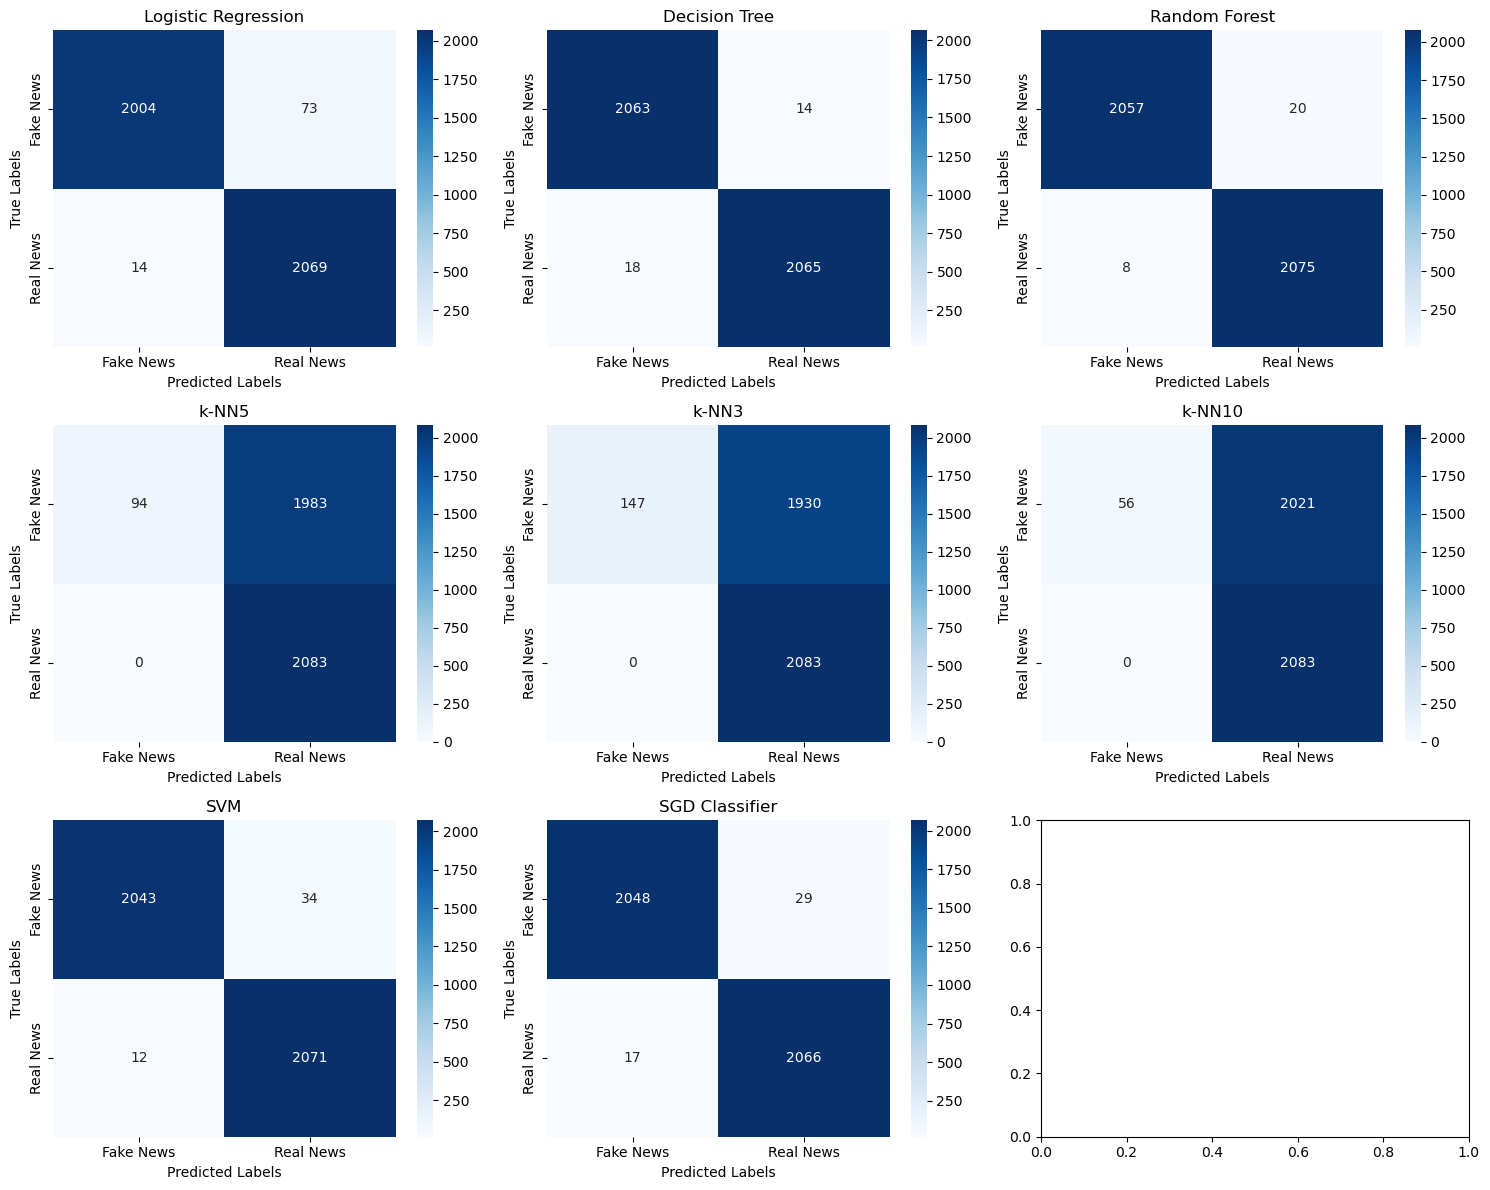

In [190]:
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Plot each confusion matrix
for i, (model_name, cm) in enumerate(confusion_matrix_results.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Fake News', 'Real News'],
                yticklabels=['Fake News', 'Real News'])
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

# Adjust layout
plt.tight_layout()
plt.show()

# Make a predictive system

In [132]:
test_new = pd.read_csv(r"C:\Users\KodavatiGeetanjali\Desktop\ML\Fake News\test.csv\test.csv")

In [134]:
test_new.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [136]:
test_new.shape

(5200, 4)

In [138]:
test_new.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [142]:
test_new = test_new.fillna('')

In [144]:
test_new.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [146]:
test_new['content'] = test_new['author'] + ' ' + test_new['title']

In [150]:
test_new['content'] = test_new['content'].apply(stemming)
print(test_new['content'])

0       david streitfeld specter trump loosen tongu pu...
1       russian warship readi strike terrorist near al...
2       common dream nodapl nativ american leader vow ...
3       daniel victor tim tebow attempt anoth comeback...
4        truth broadcast network keiser report meme war e
                              ...                        
5195    jodi rosen bangladeshi traffic jam never end n...
5196    sheryl gay stolberg john kasich sign one abort...
5197    mike mcphate california today exactli sushi ne...
5198                us marin deploy russian border norway
5199        teddi wayn awkward sex onscreen new york time
Name: content, Length: 5200, dtype: object


In [152]:
test_new.head()

,id,title,author,text,content
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",david streitfeld specter trump loosen tongu pu...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warship readi strike terrorist near al...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dream nodapl nativ american leader vow ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victor tim tebow attempt anoth comeback...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast network keiser report meme war e


In [154]:
X_new = test_new['content'].values

In [156]:
print(X_new)

['david streitfeld specter trump loosen tongu pur string silicon valley new york time'
 'russian warship readi strike terrorist near aleppo'
 'common dream nodapl nativ american leader vow stay winter file lawsuit polic'
 ... 'mike mcphate california today exactli sushi new york time'
 'us marin deploy russian border norway'
 'teddi wayn awkward sex onscreen new york time']


In [158]:
X_new = vectorizer.transform(X_new)

In [160]:
print(X_new)

  (0, 16996)	0.09607063609076329
  (0, 16088)	0.3474084724625825
  (0, 15582)	0.11956559119004007
  (0, 15368)	0.4177659247497063
  (0, 15295)	0.09426381067086603
  (0, 14605)	0.4303421027619264
  (0, 14591)	0.3735432415836393
  (0, 13850)	0.3571633139780434
  (0, 10306)	0.09286379466048247
  (0, 8842)	0.40004079737609494
  (0, 3623)	0.2267531392138668
  (1, 16473)	0.4921981982038152
  (1, 15142)	0.3550835494981517
  (1, 14603)	0.35559908473568963
  (1, 13048)	0.3052969733971102
  (1, 12300)	0.3838422559012773
  (1, 10219)	0.37818137822242154
  (1, 347)	0.3487744590431239
  (2, 16746)	0.3016628915147435
  (2, 16354)	0.2909537422615255
  (2, 14457)	0.30637021801826614
  (2, 11598)	0.21447077225895875
  (2, 10419)	0.35982822390508096
  (2, 10176)	0.3194727535249622
  (2, 8520)	0.2404012422344392
  :	:
  (5196, 5884)	0.2500401085058591
  (5196, 1517)	0.19940396943572683
  (5196, 41)	0.2656503884474958
  (5197, 16996)	0.11797520134546996
  (5197, 15336)	0.33413616793311524
  (5197, 15295)	

In [204]:
predcition = random_forest.predict(X_new)
test_new['label'] = predcition

print(predcition)

[0 1 1 ... 0 1 0]


In [208]:
test_new.head()

,id,title,author,text,content,label
0,0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",david streitfeld specter trump loosen tongu pu...,0
1,1,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warship readi strike terrorist near al...,1
2,1,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dream nodapl nativ american leader vow ...,1
3,0,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victor tim tebow attempt anoth comeback...,0
4,1,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast network keiser report meme war e,1
